# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8350 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


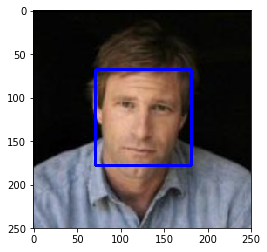

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    '''
    Human face detector using Haar feature-based cascades.
    
    Args:
        img_path: path to image
        
    Returns:
        bool value if human is detected or not
    '''
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
96% of first 100 images of humans, and 18% of first 100 images of dogs contain human faces.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
face_count_files_short = [0, 0]  # human faces in first human and dog images

for img in human_files_short:
    if face_detector(img):
        face_count_files_short[0] += 1
        
for img in dog_files_short:
    if face_detector(img):
        face_count_files_short[1] += 1
        
print("Human faces in first 100 human files:", face_count_files_short[0], "%\n" +
      "Human faces in first 100 dog files:", face_count_files_short[1], "%" )

Human faces in first 100 human files: 96 %
Human faces in first 100 dog files: 18 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated (does not work under Windows 10...).
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def process_image(img_path):
    '''
    Preprocess image at specified path to fit network
    
    Args:
        img_path: path to an image
    
    Returns:
        image: image Tensor corresponding to the preprocessed image
    '''
    image = Image.open(img_path).convert("RGB")
    
    size = 224 # Used for resize
    input_transform = transforms.Compose([
                    transforms.Resize(size),
                    transforms.CenterCrop(size),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), 
                                        (0.229, 0.224, 0.225))])
    image = input_transform(image).unsqueeze(0)
    # Move to GPU if available
    if use_cuda:
        image = image.cuda()

    return image

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image  
    VGG16.eval() # eval mode
    image = process_image(img_path)
    preds = VGG16(image)
    _, pred_index = torch.max(preds,1)
    if use_cuda:  # maybe have to np.squeeze ?!
        pred_index = pred_index.cpu().numpy()
    else:
        pred_index = pred_index.numpy()
    
    return pred_index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    '''
    Detect dogs in image at specified path, using pretrained VGG16.
    
    Args:
        img_path: path to an image
        
    Returns:
        bool if image can be classified as dog breeds
    '''
    ## Dogs in VGG16 dict lie in [151, 268] interval
    dog_range = range(151,268+1)
    index = VGG16_predict(img_path)
    if index in dog_range:   # true/false
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
0% of human_files_short have detected dogs and 93% of images in dog_files_short have detected dogs.
This could possibly be due to the fact that the set contains 133 folders/breeds, but there are 117 breeds in VGG16. Not all of the breeds entailed in the first 100 dog images need overlap.

In [9]:
### Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_count_files_short = [0, 0]  # human faces in first 100 human and dog images in the test 
for img in human_files_short:
    if dog_detector(img):
        dog_count_files_short[0] += 1
for img in dog_files_short:
    if dog_detector(img):
        dog_count_files_short[1] += 1
print("Dogs in first 100 human files:", dog_count_files_short[0], "%\n" +
      "Dogs in first 100 dog files:", dog_count_files_short[1], "%" )

Dogs in first 100 human files: 0 %
Dogs in first 100 dog files: 93 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
import re
import numpy as np
from glob import glob
from PIL import ImageFile
# Set PIL to be tolerant of image files that are truncated.
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch
import torch.optim as optim
import torch.nn.init as init
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets
import torchvision.transforms as transforms
import torchvision.models as models

In [39]:
# Initiate parameters
n_classes = 133
batch_size = 30
n_epochs = 200
num_workers = 2
lr = 0.001 # learning rate

In [40]:
# Check if CUDA is available
use_cuda = torch.cuda.is_available()

# Training transforms
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    transforms.Normalize(torch.tensor([ 0.4870,  0.4665,  0.3972]), torch.tensor([ 0.2239,  0.2193,  0.2187]))
])
# Same transform for test and validation sets
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    transforms.Normalize(torch.tensor([ 0.4870,  0.4665,  0.3972]), torch.tensor([ 0.2239,  0.2193,  0.2187]))
])

# Data location>
data_dir = "dogImages/"

# Train, validation and test data location
train_dir = os.path.join(data_dir,"train/")
valid_dir = os.path.join(data_dir,"valid/")
test_dir = os.path.join(data_dir,"test/")

# Load and transform data
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)# + datasets.ImageFolder(train_dir, transform=train_transforms) + datasets.ImageFolder(train_dir, transform=train_transforms) # Increase sample threefold 
valid_data = datasets.ImageFolder(valid_dir, transform=test_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

loaders_scratch = {
    "train": torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers),
    "valid": torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=num_workers), # There really is no point in shuffling test and validation datasets...
    "test" : torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)   # There really is no point in shuffling test and validation datasets...
}

# print out some data stats
print('Num training images: ', len(train_data)) # 'Leonberger_06571.jpg' removed because caused truncated file error
print('Num training images: ', len(valid_data))
print('Num test images: ', len(test_data))

Num training images:  6679
Num training images:  835
Num test images:  836


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: The images are randomly fliped across the horizon, randomly rotated by 20 degrees and then randomly cropped to 224x224 px before they are transformed to tensors and then normalized with values used during the course. The normalization corresponds to the PyTorch "model zoo" normalization, for simplicity and to align with models imported from there. I don't expect it to be perfect, but good enough. I also chose 3 x 224 x 224 px tensors for simplicity, expecting that it would yeild adequate results, also being the default input size for VGG16, the first network to be imported.

I tried MANY more complex and varied transformation but they yielded worse training results, probably for adding to much noise, whitespace padding, complexity etc.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn.init as init

def weight_init_normal(model):
    '''
    Initialize network weigths to normal random distribution.
    From: https://gist.github.com/jeasinema/ed9236ce743c8efaf30fa2ff732749f5
    
    Args:
        model: an initialize model
    
    Returns: None
    
    Usage:
        model = Model()
        model.apply(weight_init)
    '''
    if isinstance(model, nn.Conv2d):
        init.xavier_normal_(model.weight.data)
        if model.bias is not None:
            init.normal_(model.bias.data)
    elif isinstance(model, nn.Linear):
        init.xavier_normal_(model.weight.data)
        init.normal_(model.bias.data)
    elif isinstance(model, nn.BatchNorm2d):
        init.normal_(model.weight.data, mean=1, std=0.02)
        init.constant_(model.bias.data, 0)

In [ ]:
linear_inputs = 50176
# Simple network for testing. BatchNorm before ReLU and with bias = False
class Net_theory(nn.Module):
    def __init__(self, n_classes = 133):  #n_classes = 133 for my problem
        super(Net_theory, self).__init__()
        # Feature layers
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(16, 32, 3, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(32, 64, 3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.MaxPool2d(2,2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(linear_inputs,2048),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(2048,n_classes)
        )
        
    def forward(self, x):
        # Convolutions
        x = self.features(x)
        # Flatten input for classifier
        x = x.view(-1, linear_inputs)
        # Linear classifier
        x = self.classifier(x)
        
        return x
    
#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net_theory(n_classes)
# normally distributed weights
model_scratch.apply(weight_init_normal)

if use_cuda:
    model_scratch = model_scratch.cuda()

In [41]:
linear_inputs = 50176
# Simple network for testing. BatchNorm after activation but before MaxPool
class Net(nn.Module):
    def __init__(self, n_classes = 133):  #n_classes = 133 for my problem
        super(Net, self).__init__()
        # Feature layers
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(True),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(linear_inputs,3136),
            nn.ReLU(True),
            nn.Dropout(.2),
            nn.Linear(3136,n_classes)
        )
        
    def forward(self, x):
        # Convolutions
        x = self.features(x)
        # Flatten input for classifier
        x = x.view(-1, linear_inputs)
        # Linear classifier
        x = self.classifier(x)
        
        return x
    
#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net(n_classes)
# normally distributed weights
model_scratch.apply(weight_init_normal)

if use_cuda:
    model_scratch = model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ My original plan was to start by emulating known networks (e.g. VGG16 and other similar) and then modify but after countless attempts I still got nowhere except stagnation around 10 epochs with training error ~4.8 with normaly initialized weights (somewhat higher with out) and accuracy ~1%. I tried even deeper networks with no improvment, just more time consuming computations. Trying trained and untrained predefined models, ResNet18 and at least got some progress (~3%). After additional research (including Udacity Student Hub and asking mentors) I found people suggesting that shallow networks were better for this task. I reduced network size - number of layers and depth of layers - which allows faster training and testing iterations.

The network uses 2 dimensional convolutions `Conv2D` with small kernels (3,3) and step length 1 and padding 1 for all convolutions. It uses `ReLU` activation functions for nonlinearity.

[BatchNorm (BN)](https://arxiv.org/pdf/1502.03167.pdf) layers make normalization a part of the hidden layers, does it for each minibatch, for each activation function. BN reduces covariant shift (the difference in mean and standard deviation for each minibatch - i.e. difference between a yellow vs black labrador is smaller i.e. should reduce intraclass variation). BN makes learning more stable, should allowing higher learning rates and gives some regularization (more for smaller batch sizes). According to the original paper BN should be put between the tansform (`Conv`), at least in theory (`Net_theory`). In practice training performance was worse every time at the same iteration when putting the BN before the `ReLU`, and putting it at the end of each block, after `MaxPool2D`, gave best training outcome, as in `Net`. BN also eliminates the need for bias terms (`Conv2D(..., bias=False)`) where it is used, but not when put after the activation function. For activation function `ReLU(inplace)` is used, where `inplace` should reduce memory and gives some speed up. 

`MaxPool2D` is used to generalize and downscale the images, and moving BN after it did not perform well wither and makes little sense.

After the convolutions the tensor is flattened and passed thorugh a linear classifer with `ReLU` activation and `Dropout` layer (p=.2 seems to be a choice, [here](https://arxiv.org/abs/1801.05134) and [here](https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md), with BN).

Repeating blocks were added iteratively for a deeper and more complex architecture, untill something worked. In the fully connected linear classifier, adding more `Linear` layers had a deterimental effect on training and also took more time to compute.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [42]:
import torch.optim as optim

# Error criterion function for scratch network
criterion_scratch = nn.CrossEntropyLoss()
# Optimizer Adam for scratch network
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=lr)
# Scheduler to reduce learning rate when learning stagnates
lr_scheduler_scratch = None #optim.lr_scheduler.ReduceLROnPlateau(optimizer_scratch, 'min', verbose=True)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
def train(n_epochs, loaders, model, optimizer, criterion=nn.CrossEntropyLoss(),
                                               use_cuda=True,
                                               save_path='model_default_train_save.pt',
                                               lr_scheduler=None):
    """
    Model trainer.
    
    Args:
        n_epochs: numer of training iterations of the complete training set
        loaders: dataLoader with data for training
        model: model to train
        optimizer: backward propagation optimizer
        criterion: training criterion
        use_cuda: if cuda should be used for training
        save_path: save path for trained model
        lr_scheduler: learning rate scheduler for changing learning rates during training
        
    Returns: trained model
    """ 
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU if possible
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            def closure():
                '''
                Compute the training error and gradient as input to optimizer. Required for 
                some optimizers (e.g. conjugate gradient and LBFGS).
                '''
                # Reset graditents for training batch
                optimizer.zero_grad()
                # Forward prop
                output = model(data)
                # Compute loss
                loss = criterion(output,target)
                # Backprop
                loss.backward()
                # Update global closure_loss - for training error
                global closure_loss
                closure_loss = loss
                return loss
            optimizer.step(closure)
            # Train loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (closure_loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU if possible
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                # forward pass
                output = model(data)
                # calculate loos
                loss = criterion(output, target)
                # Validation loss
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (closure_loss.data - valid_loss))

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## Save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Current validation Loss: {:.6f} \tPrevious min validation Loss: {:.6f}'.format(
            valid_loss,
            valid_loss_min
            ))
            valid_loss_min = valid_loss
            print('Lowest validation score so far. Saving current model to: \t ' + save_path)
            
        # Learning rate scheduler decreases learning rate when learning stagnates. Optional
        if lr_scheduler == None:
            pass
        else:
            lr_scheduler.step(valid_loss_min)
            
    # return trained model
    return model

In [43]:
# train the model
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt', lr_scheduler_scratch)

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 11.253815 	Validation Loss: 5.413684
Current validation Loss: 5.413684 	Previous min validation Loss: inf
Lowest validation score so far. Saving current model to: 	 model_scratch.pt
Epoch: 2 	Training Loss: 4.993729 	Validation Loss: 4.810856
Current validation Loss: 4.810856 	Previous min validation Loss: 5.413684
Lowest validation score so far. Saving current model to: 	 model_scratch.pt
Epoch: 3 	Training Loss: 4.854516 	Validation Loss: 5.069250
Epoch: 4 	Training Loss: 4.830482 	Validation Loss: 4.566147
Current validation Loss: 4.566147 	Previous min validation Loss: 4.810856
Lowest validation score so far. Saving current model to: 	 model_scratch.pt
Epoch: 5 	Training Loss: 4.780209 	Validation Loss: 4.549835
Current validation Loss: 4.549835 	Previous min validation Loss: 4.566147
Lowest validation score so far. Saving current model to: 	 model_scratch.pt
Epoch: 6 	Training Loss: 4.730893 	Validation Loss: 4.927784
Epoch: 7 	Training Loss: 4.718898 	Val

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [44]:
def test(loaders, model, criterion=nn.CrossEntropyLoss(),
                         use_cuda=True):
    """
    Test model accuracy and print results.
    
    Args:
        loaders: DataLoader with data for testing
        model: model to test
        criterion: test criterion for accuracy
        use_cuda: if cuda should be used for training
        
    Returns: None
    """
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(loaders['test']):
            # move to GPU if possible
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass
            output = model(data)
            # calculate loss
            loss = criterion(output, target)
            # update average test loss 
            test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
            # convert output probabilities to predicted class
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('Test Accuracy: %2d%% (%2d/%2d)\n' % (
        100. * correct / total, correct, total))

In [45]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.879923

Test Accuracy: 27% (230/836)



---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [46]:
# Data loaders - reuse from scratch
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [47]:
# Transfer learning base model architecture 
model_transfer = models.resnet18(pretrained=True)

# Freeze layers
for param in model_transfer.parameters():
    param.requires_grad = False

# Create classifier for classifying dog breed data
from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(512, 200)),
    ('relu', nn.ReLU()),
    ('dropout', nn.Dropout()),
    ('fc2', nn.Linear(200,133))
]))

# Initiate classifier weights and replace classifier layer
model_transfer.fc = classifier.apply(weight_init_normal)

if use_cuda:
    model_transfer = model_transfer.cuda()

In [ ]:
model_transfer

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ ResNet is interesting because it circumvents some of the vanishing gradient problem by feeding the gradient backwards to several previous blocks and not just the previous, and it uses repeating blocks. ResNet18 was also relatively small so testing different configurations would probably be smoother.
Upon importing the network I froze its parameters to prevent it from changing the weights upon training. The last layer "fc" was replaced with a two layer linear classifier to allow some training. Only the last linear layers of my classifier are then passed to the optimizer for the step function.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [50]:
criterion_transfer = nn.CrossEntropyLoss()
# Train the fc parameters, other parameters are frozen
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=lr)
lr_scheduler_transfer = None #optim.lr_scheduler.ReduceLROnPlateau(optimizer_transfer, 'min', verbose=True)
n_epochs = 10

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [51]:
# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt', lr_scheduler_transfer)

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 1.923084 	Validation Loss: 1.807306
Current validation Loss: 1.807306 	Previous min validation Loss: inf
Lowest validation score so far. Saving current model to: 	 model_transfer.pt
Epoch: 2 	Training Loss: 1.853415 	Validation Loss: 1.172482
Current validation Loss: 1.172482 	Previous min validation Loss: 1.807306
Lowest validation score so far. Saving current model to: 	 model_transfer.pt
Epoch: 3 	Training Loss: 1.804321 	Validation Loss: 1.781694
Epoch: 4 	Training Loss: 1.755072 	Validation Loss: 1.641067
Epoch: 5 	Training Loss: 1.724045 	Validation Loss: 1.482714
Epoch: 6 	Training Loss: 1.714508 	Validation Loss: 1.524514
Epoch: 7 	Training Loss: 1.674713 	Validation Loss: 1.145355
Current validation Loss: 1.145355 	Previous min validation Loss: 1.172482
Lowest validation score so far. Saving current model to: 	 model_transfer.pt
Epoch: 8 	Training Loss: 1.692765 	Validation Loss: 1.679636
Epoch: 9 	Training Loss: 1.649144 	Validation Loss: 1.984832
Epo

In [52]:
torch.save(model_transfer.state_dict(), 'model_transfer.pt')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [53]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.653283

Test Accuracy: 79% (662/836)



### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [54]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
class_names = [item[4:].replace("_", " ") for item in test_data.classes]

## Duplicates process_image() functionality !!!!
#def load_image(img_path, size=224, shape=None):
#    ''' Load image and transform it to size x size px. '''
#    image = Image.open(img_path)#.convert('RGB')
#    in_transform = transforms.Compose([transforms.Resize(size),
#                                       transforms.RandomCrop(size),
#                                       transforms.ToTensor(),
#                                       transforms.Normalize((0.485, 0.456, 0.406),
#                                                            (0.229, 0.224, 0.225))])
#    # Apply transform and add batch dimension
#    image = in_transform(image).unsqueeze(0)
#    return image

def predict_breed(img_path, model):
    '''
    Predict dog breed from image in path.
    
    Args:
        img_path: path to image
        model: CNN model
    
    Returns:
        string with name of predicted model
    '''
    # load and transform the image
    image = process_image(img_path)
    if use_cuda:
        # move model and image to GPU
        model.cuda()
        image = image.cuda()
    else:
        # move model to CPU
        model.cpu()
    # Set to eval mode, needs to be done after moving to cuda/cpu
    model.eval()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(image)
    # convert output probabilities to predicted class
    pred = output.data.max(1, keepdim=True)[1]
    # get class name of class
    pred_class = class_names[(pred[0][0])]
    
    return pred_class

def predict_breed_transfer(img_path):
    '''
    Compliance wrapper for predict_breed with model_transfer.
    
    Args:
        img_path: path to image
        
    Returns:
        string with name of predicted dogbreed using model_transfer
    '''
    model = model_transfer
    return predict_breed(img_path, model)

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [55]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
# XXXXXX T&D place holder
def run_app(img_path):
    '''
    Predict dog breed or if human, predict dog breed resemblance in human.
    If neither is detected, error information will be output to the user.
    
    Args:
        img_path: path to image
        
    Returns:
        None
    '''
    # Default outcome
    pred = None
    # detect dog
    dog = dog_detector(img_path)
    # detect human face
    human = face_detector(img_path)
    # handle cases for a human face, dog, and neither
    if dog or human:
        pred = predict_breed_transfer(img_path)
    
    def output(pred, img_path=img_path):
        '''
        Output generation.
        
        Args:
            pred: prediction string
            img_path: path to image
        
        Returns:
            None
        '''
        if pred == None:
            print('No human or dog was detected in image (at path ' + img_path + ".)") # XXXXX T&D Place holder
        else:
            print(pred + ' predicted in image (at path ' + img_path + ".)") # XXXXX T&D Place holder
    
    output(pred)

German pinscher predicted in image (at path lfw\Abdoulaye_Wade\Abdoulaye_Wade_0004.jpg.)
Dog detected!


TypeError: Invalid dimensions for image data

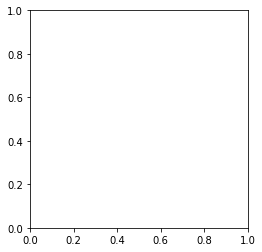

In [62]:
# XXXXX T&D place holder
# Test function 
img_path = human_files_short[20]
predict_breed_transfer(img_path)
run_app(img_path)

# print number of faces detected in the image
print('Dog detected!')

# convert BGR image to RGB for plotting
#cv_rgb = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
img = process_image(img_path)
plt.imshow(img)
plt.show()

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Model can be improved with longer training, but would then benefit from a more complex learning rate scheduler. Both could allow the network to find other/better optimas. More training data could enhance the model. Using a deeper network could be beneficial (e.g. ResNet50 or higher) since it is only the classifier that needs to be trained and update, and the other layers can hold helpful detectors. Beeing more creative with the convolutional layers (larger kernels, other stepsizes, no padding etc) could yeild interesting results allowing speed up and detection of more varied features, especially since most usefull information probably are not at the edges of the images.

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)